In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

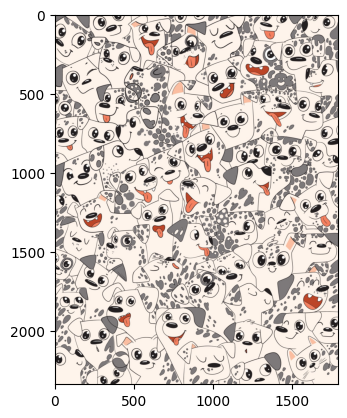

In [3]:
image = cv2.imread('Finding/cut_2.png')
plt.imshow(image[:, :, ::-1])

In [4]:
object_list = os.listdir('match_template/Finding/2')
object_list = [os.path.join('match_template/Finding/2', obj) for obj in object_list]
object_list

['match_template/Finding/2\\ball.png',
 'match_template/Finding/2\\bird.png',
 'match_template/Finding/2\\bone.png',
 'match_template/Finding/2\\bow.png',
 'match_template/Finding/2\\bug.png',
 'match_template/Finding/2\\butterfly.png',
 'match_template/Finding/2\\cloud.png',
 'match_template/Finding/2\\format.png',
 'match_template/Finding/2\\ice_scream.png',
 'match_template/Finding/2\\ice_scream2.png',
 'match_template/Finding/2\\sausage.png',
 'match_template/Finding/2\\strawberry.png']

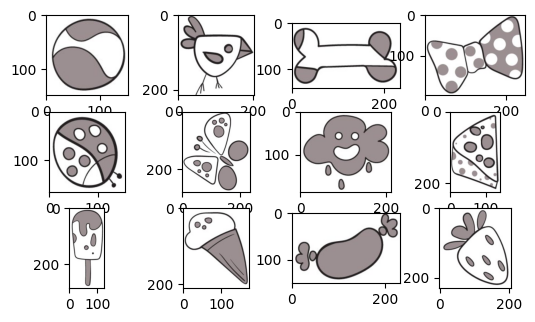

In [6]:
def get_template(folder_path: str):
    templates = []
    for file in os.listdir(folder_path):
        template = cv2.imread(os.path.join(folder_path, file))
        templates.append(template)
    return templates

templates = get_template('match_template/Finding/2')
for idx in range(len(templates)):
    plt.subplot(4, 4, idx + 1)
    img = templates[idx]
    # print(img)
    plt.imshow(templates[idx][:, :, ::-1])

In [12]:
output_image = image.copy()

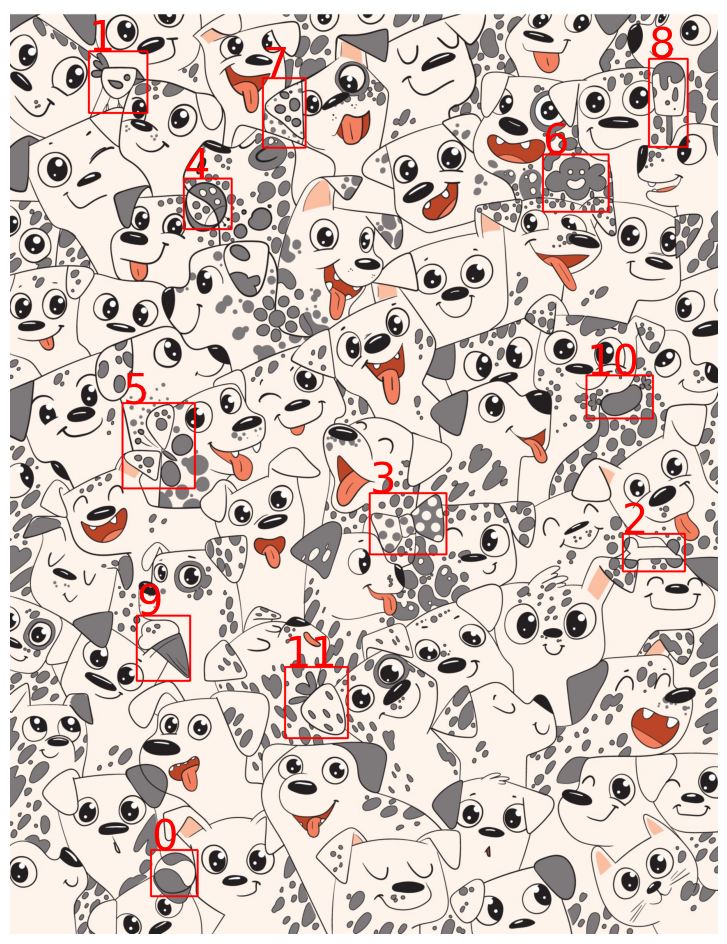

In [17]:
scales = np.linspace(0.5, 1, 10)
res_points = [] # store the result of each object
for object_path in object_list:
    template = cv2.imread(object_path)

    max_val_global = -1
    best_match_loc = None
    best_scale = None
    best_w, best_h = None, None

    for scale in scales:
        resized_template = cv2.resize(template, (0, 0), fx=scale, fy=scale)

        w, h = resized_template.shape[1], resized_template.shape[0]

        if w > image.shape[1] or h > image.shape[0]:
            continue

        result = cv2.matchTemplate(image, resized_template, cv2.TM_CCOEFF_NORMED)

        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if max_val > max_val_global:
            max_val_global = max_val
            best_match_loc = max_loc
            best_scale = scale
            best_w, best_h = w, h

    if best_match_loc is not None:
        top_left = best_match_loc
        bottom_right = (top_left[0] + best_w, top_left[1] + best_h)
        cv2.rectangle(output_image, top_left, bottom_right, (0, 0, 255), 4)
        res_points.append(top_left)

plt.figure(figsize=(12, 12))
for idx in range(len(res_points)):
    plt.annotate(f'{idx}', res_points[idx], color='red', fontsize=30)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()